In [ ]:
### Importing all the libraries required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set()

from sklearn import preprocessing,metrics
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import silhouette_score

In [ ]:
### Reading the data

pantry_bkp=pd.read_csv('clean_data_finall.zip',compression='zip')

pantry_bkp.head()

,overall,verified,Date,reviewerID,asin,reviewerName,unixReviewTime,description,title,also_buy,brand,feature,rank,also_view,price,review_text,clean_text,Polarity,Analysis
0,4,True,2015-09-24,A31Y9ELLA1JUB0,B0000DIWNI,Her Royal Peepness Princess HoneyBunny Blayze,1443052800,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Pretty Good For plastic Wrap I purchased this ...,pretty good plastic wrap purchase saran premiu...,0.187037,Neutral
1,5,True,2015-06-23,A2FYW9VZ0AMXKY,B0000DIWNI,Mary,1435017600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,"The Best Plastic Wrap for your Cooking, Baking...",best plastic wrap cook bake food storage need ...,0.317857,Positive
2,5,True,2015-06-13,A1NE43T0OM6NNX,B0000DIWNI,Tulay C,1434153600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,"Good and strong. Good wrap, keeping it in the ...",good strong good wrap keep fridge make easier ...,0.611111,Positive
3,4,True,2015-06-03,AHTCPGK2CNPKU,B0000DIWNI,OmaShops,1433289600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Doesn't cling as well to dishes as other brand...,doesn t cling dish brand tangle prefer saran w...,0.000000,Neutral
4,5,True,2015-04-20,A25SIBTMVXLB59,B0000DIWNI,Nitemanslim,1429488000,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Five Stars Thanks,star thank,0.000000,Neutral


In [ ]:
pantry_bkp.dropna(inplace=True)

In [ ]:
### changing the column name
pantry_bkp.rename(columns={'overall':'rating'},inplace=True)

In [ ]:
### Checking null values

pantry_bkp.isnull().sum()

rating            0
verified          0
Date              0
reviewerID        0
asin              0
reviewerName      0
unixReviewTime    0
description       0
title             0
also_buy          0
brand             0
feature           0
rank              0
also_view         0
price             0
review_text       0
clean_text        0
Polarity          0
Analysis          0
dtype: int64

In [ ]:
### Checking the shape of the data

pantry_bkp.shape

(137480, 19)

In [ ]:
### Extracting the variables

X1=pantry_bkp.loc[:,['rating','price','Polarity']].values

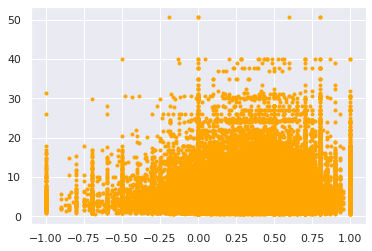

In [ ]:
plt.scatter(X1[ : , 2], X1[ : , 1],marker ='.', c='orange')    ### to plot the data before clustering

## K-means Clustering


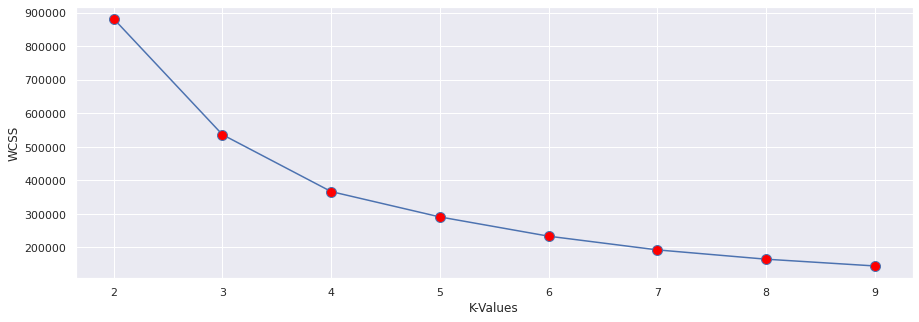

In [ ]:
distortion=[]   ### To store the wcss values

for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=22)     ### Defining model
    kmeans.fit(X1)                                  ### Fitting the model
    
    distortion.append(kmeans.inertia_)             ### Inertia is the sum of squared distances of samples to their closest cluster centre
    
fig=plt.figure(figsize=(15,5))                      ### Size of the plot
plt.plot(range(2,10),distortion,marker='o',markerfacecolor='red',markersize=10)   ## plotting the graph
plt.grid(True)
plt.xlabel("K-Values")
plt.ylabel("WCSS")
plt.show()

In [ ]:
#### From the above graph the elbow is bending at 3, so considering the clusters as 3


kmeans_3=KMeans(n_clusters=3,random_state=22)   ### Defining model with cluster as 3
kmeans_3.fit(X1)                                ### Fitting the model

KMeans(n_clusters=3, random_state=22)

In [ ]:
cluster_labels=kmeans_3.fit_predict(X1)          ### To predict the clusters 
pantry_bkp['K_cluster']=cluster_labels           ### Adding K_cluster column in the dataset which shows cluster labels
pantry_bkp.head()

,rating,verified,Date,reviewerID,asin,reviewerName,unixReviewTime,description,title,also_buy,brand,feature,rank,also_view,price,review_text,clean_text,Polarity,Analysis,K_cluster
0,4,True,2015-09-24,A31Y9ELLA1JUB0,B0000DIWNI,Her Royal Peepness Princess HoneyBunny Blayze,1443052800,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Pretty Good For plastic Wrap I purchased this ...,pretty good plastic wrap purchase saran premiu...,0.187037,Neutral,0
1,5,True,2015-06-23,A2FYW9VZ0AMXKY,B0000DIWNI,Mary,1435017600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,"The Best Plastic Wrap for your Cooking, Baking...",best plastic wrap cook bake food storage need ...,0.317857,Positive,0
2,5,True,2015-06-13,A1NE43T0OM6NNX,B0000DIWNI,Tulay C,1434153600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,"Good and strong. Good wrap, keeping it in the ...",good strong good wrap keep fridge make easier ...,0.611111,Positive,0
3,4,True,2015-06-03,AHTCPGK2CNPKU,B0000DIWNI,OmaShops,1433289600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Doesn't cling as well to dishes as other brand...,doesn t cling dish brand tangle prefer saran w...,0.000000,Neutral,0
4,5,True,2015-04-20,A25SIBTMVXLB59,B0000DIWNI,Nitemanslim,1429488000,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Five Stars Thanks,star thank,0.000000,Neutral,0


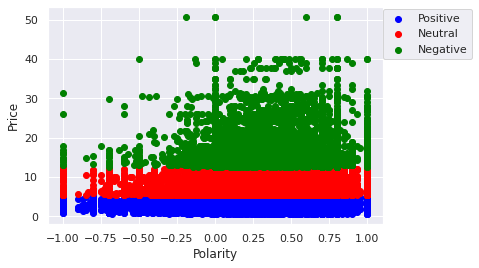

In [ ]:
### Plotting 2D graph considering parameters Price and polarity

plt.scatter(X1[cluster_labels==0,2] , X1[cluster_labels==0,1], c='Blue',label='Positive' )
plt.scatter(X1[cluster_labels==1,2] , X1[cluster_labels==1,1], c='red' ,label='Neutral')
plt.scatter(X1[cluster_labels==2,2] , X1[cluster_labels==2,1], c='green',label='Negative')


plt.xlabel('Polarity' )
plt.ylabel('Price')
plt.legend(loc=(1,.76))
plt.show()

In [ ]:
pantry_bkp['K_cluster'].unique()

array([0, 2, 1], dtype=int32)

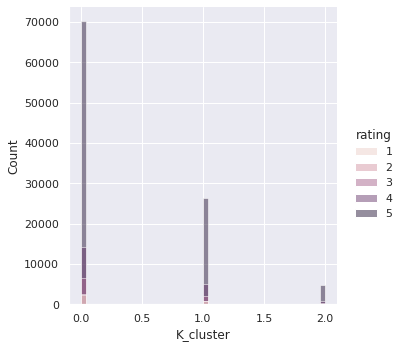

In [ ]:
### To plot the clusters based on rating 

sns.displot(x=pantry_bkp['K_cluster'],hue=pantry_bkp['rating']);

In [ ]:
### From the above graph we can see that all the cluster are mostlty rated as 5

In [ ]:
### To know the avg. prices of the cluster
pantry_bkp.groupby('K_cluster')['price'].mean()  

K_cluster
0     3.075906
1     7.721831
2    17.288123
Name: price, dtype: float64

In [ ]:
price = pantry_bkp.groupby('K_cluster')['price'].sum()

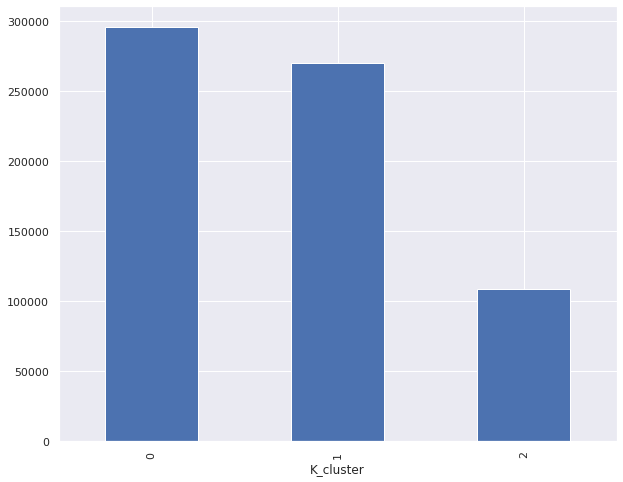

In [ ]:
plt.figure(figsize=(10,8))
price.plot(kind='bar')
plt.show()

In [ ]:
pantry_bkp.groupby('K_cluster')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
K_cluster,,,,,,,,
0,96181.0,3.075906,1.120102,0.50,2.29,2.98,3.88,5.40
1,35024.0,7.721831,1.902982,5.40,5.99,7.00,8.99,12.50
2,6275.0,17.288123,5.066313,12.55,13.75,15.54,18.73,50.75


In [ ]:
pantry_bkp.head(2)

,rating,verified,Date,reviewerID,asin,reviewerName,unixReviewTime,description,title,also_buy,brand,feature,rank,also_view,price,review_text,clean_text,Polarity,Analysis,K_cluster
0,4,True,2015-09-24,A31Y9ELLA1JUB0,B0000DIWNI,Her Royal Peepness Princess HoneyBunny Blayze,1443052800,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Pretty Good For plastic Wrap I purchased this ...,pretty good plastic wrap purchase saran premiu...,0.187037,Neutral,0
1,5,True,2015-06-23,A2FYW9VZ0AMXKY,B0000DIWNI,Mary,1435017600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,"The Best Plastic Wrap for your Cooking, Baking...",best plastic wrap cook bake food storage need ...,0.317857,Positive,0


In [ ]:
pantry_bkp['Analysis'].value_counts()

Positive    88791
Neutral     41663
Negative     7026
Name: Analysis, dtype: int64

In [ ]:
# label '0'=Positive
# label '1'=Neutral
# label '2'=Negative

pantry_bkp['K_cluster'].value_counts()  ### Total count of eash cluster

0    96181
1    35024
2     6275
Name: K_cluster, dtype: int64

From above, we can say the brands with low prices have the Positive reviwes whereas the brands with high prices have Negative reviews.


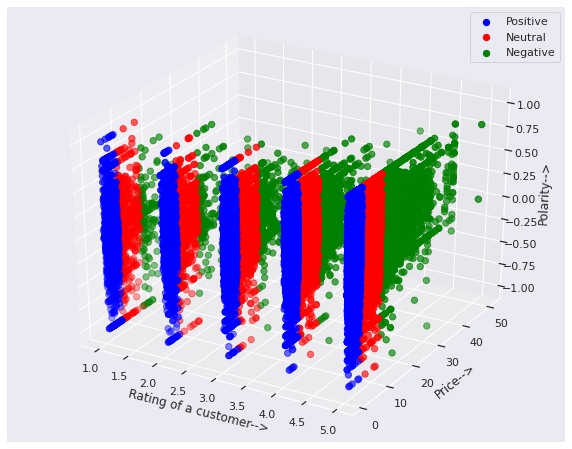

In [ ]:
# 3d scatterplot using matplotlib for rating, price and polarity

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[cluster_labels == 0,0],X1[cluster_labels == 0,1],X1[cluster_labels == 0,2], s = 40 , color = 'blue', label = "Positive")
ax.scatter(X1[cluster_labels == 1,0],X1[cluster_labels == 1,1],X1[cluster_labels == 1,2], s = 40 , color = 'red', label = "Neutral")
ax.scatter(X1[cluster_labels == 2,0],X1[cluster_labels == 2,1],X1[cluster_labels == 2,2], s = 40 , color = 'green', label = "Negative")

ax.set_xlabel('Rating of a customer-->')
ax.set_ylabel('Price-->')
ax.set_zlabel('Polarity-->')
ax.legend()
plt.show()

In [ ]:
### from the above graph we can say that as the rating and the price increases the negative reviews also increases
### for Low rating the reviews are very less

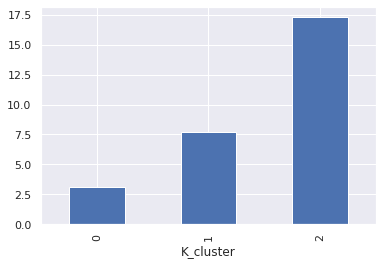

In [ ]:
pantry_bkp.groupby('K_cluster')['price'].mean().plot(kind='bar');

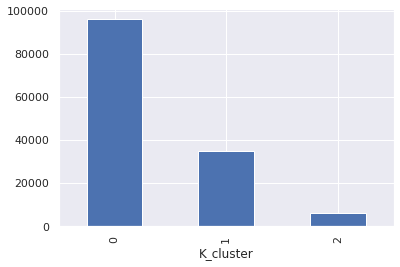

In [ ]:
pantry_bkp.groupby('K_cluster')['reviewerID'].count().plot(kind='bar');

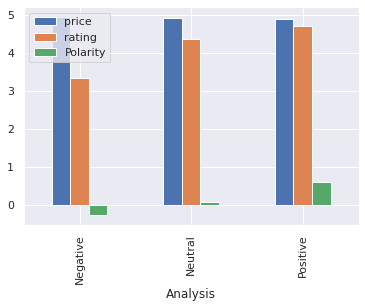

In [ ]:
pantry_bkp.groupby('Analysis')['price','rating','Polarity'].mean().plot(kind='bar');

# Clustering on the reviews (clean_text column)

In [ ]:
### Vectorization of clean_text
tfidf =TfidfVectorizer()                              ###  Defining model

text=tfidf.fit_transform(pantry_bkp['clean_text'])    ### Fitting the model

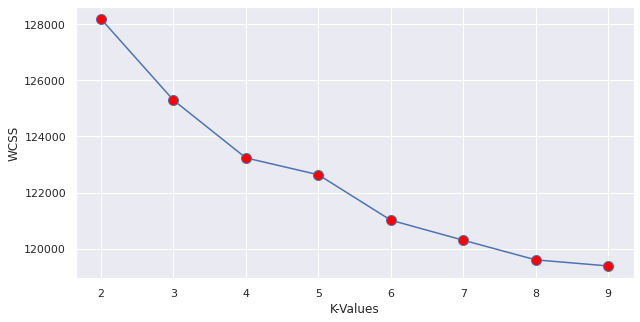

In [ ]:
### Elbow method to find the optimal value of k

distortion=[]   ### To store the wcss values

for k in range(2,10):                            ### To give the range for K values
    kmeans=KMeans(n_clusters=k,random_state=22)  ### Defining model
    kmeans.fit(text)                             ### Fitting the model
    
    distortion.append(kmeans.inertia_)   ### apending the wcss values
    
fig=plt.figure(figsize=(10,5))           ### Plot/ figure size
plt.plot(range(2,10),distortion,marker='o',markerfacecolor='red',markersize=10)   ### Plotting the graph
plt.grid(True)
plt.xlabel("K-Values")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans_4=KMeans(n_clusters=4,random_state=22)      ### From above we got clusters as 4
kmeans_4.fit(text)                                 ### to fit the model

KMeans(n_clusters=4, random_state=22)

In [ ]:
cluster_labels=kmeans_4.fit_predict(text)         ### predicting the clusters
pantry_bkp['K_cluster']=cluster_labels            ### Adding K_cluster column to the dataset which shows the cluster labels
pantry_bkp.head()

,rating,verified,Date,reviewerID,asin,reviewerName,unixReviewTime,description,title,also_buy,brand,feature,rank,also_view,price,review_text,clean_text,Polarity,Analysis,K_cluster
0,4,True,2015-09-24,A31Y9ELLA1JUB0,B0000DIWNI,Her Royal Peepness Princess HoneyBunny Blayze,1443052800,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Pretty Good For plastic Wrap I purchased this ...,pretty good plastic wrap purchase saran premiu...,0.187037,Neutral,3
1,5,True,2015-06-23,A2FYW9VZ0AMXKY,B0000DIWNI,Mary,1435017600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,"The Best Plastic Wrap for your Cooking, Baking...",best plastic wrap cook bake food storage need ...,0.317857,Positive,3
2,5,True,2015-06-13,A1NE43T0OM6NNX,B0000DIWNI,Tulay C,1434153600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,"Good and strong. Good wrap, keeping it in the ...",good strong good wrap keep fridge make easier ...,0.611111,Positive,3
3,4,True,2015-06-03,AHTCPGK2CNPKU,B0000DIWNI,OmaShops,1433289600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Doesn't cling as well to dishes as other brand...,doesn t cling dish brand tangle prefer saran w...,0.000000,Neutral,3
4,5,True,2015-04-20,A25SIBTMVXLB59,B0000DIWNI,Nitemanslim,1429488000,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Five Stars Thanks,star thank,0.000000,Neutral,0


In [ ]:
pantry_bkp['K_cluster'].unique()             ### To check the unique values of clsters

array([3, 0, 1, 2], dtype=int32)

### PCA(Principle Component Analysis)

In [ ]:
### Importing req. lib.
from sklearn.decomposition import PCA              

In [ ]:
text.shape[0]    ### To check the shape of text

137480

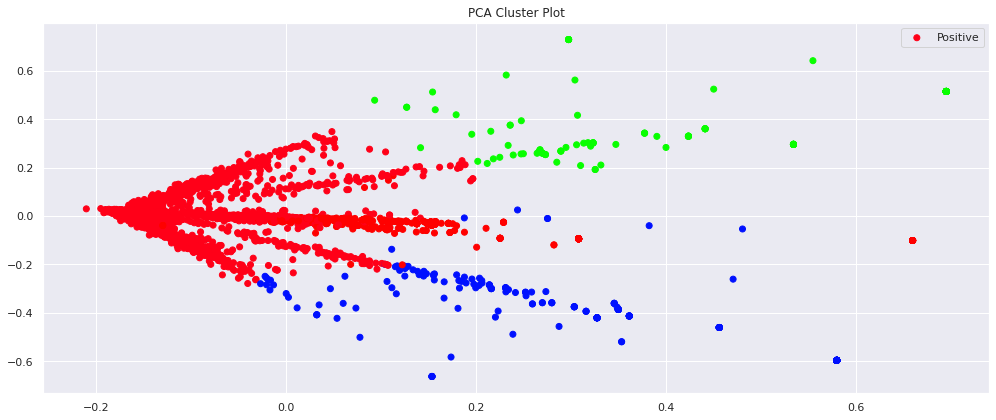

In [ ]:
### Defining a function to define a model, fitting the model and ploting the cluster

def plot_pca(data, labels):
    max_label = max(labels)                 
    max_items = np.random.choice(range(data.shape[0]), size=10000, replace=False)     ### To choose 10000 random reviews from the dataset
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())      ### to fit the model
    
    
    
    idx = np.random.choice(range(pca.shape[0]), size=3000, replace=False)     ### to choose random 3000 values from the fitted model
    label_subset = labels[max_items]                                         
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]           ### to assign colors to the clusters
    
    fig= plt.figure( figsize=(14, 6))                                         ### figure size
    
    plt.scatter(pca[idx, 0], pca[idx, 1], c=label_subset)                     ### plot scatter plot
    plt.title('PCA Cluster Plot')                                             ### title of the plot
    plt.legend(labels=['Positive','Negative','Neutral'])                      ### legend of the plot
    plt.tight_layout()
    
    
plot_pca(text, cluster_labels)                                               ### calling the function
    


In [ ]:
cluster_labels

array([3, 3, 3, ..., 3, 3, 1], dtype=int32)

In [ ]:
df = pd.DataFrame(cluster_labels, columns = ['clus'])
df['clus'].value_counts()

3    99259
0    19855
2     9785
1     8581
Name: clus, dtype: int64

In [ ]:
#### As we always take odd value for k to avoid confusion between 2 classes
### For 3 clusters

In [ ]:
kmeans_3=KMeans(n_clusters=3,random_state=22)
kmeans_3.fit(text)
cluster_labels=kmeans_3.fit_predict(text)
pantry_bkp['K_cluster']=cluster_labels
pantry_bkp['K_cluster'].unique()

array([1, 0, 2], dtype=int32)

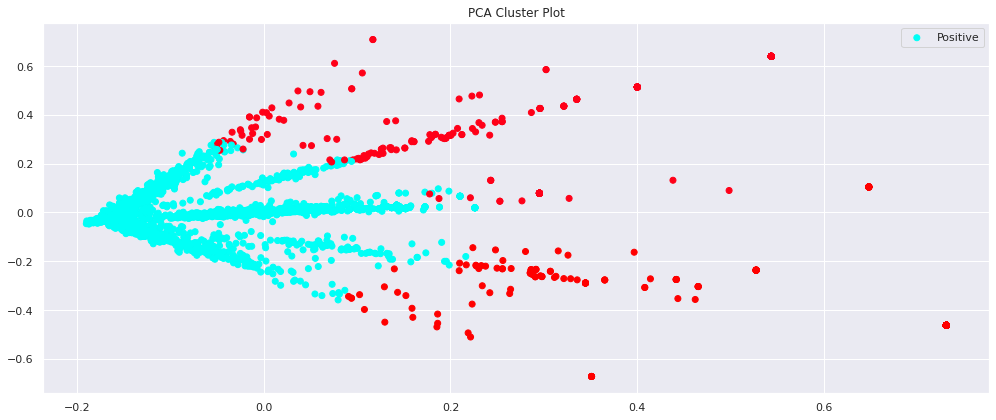

In [ ]:
### Defining a function to define a model, fitting the model and ploting the cluster

def plot_pca(data, labels):
    max_label = max(labels)                 
    max_items = np.random.choice(range(data.shape[0]), size=10000, replace=False)     ### To choose 10000 random reviews from the dataset
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())      ### to fit the model
    
    
    
    idx = np.random.choice(range(pca.shape[0]), size=3000, replace=False)     ### to choose random 3000 values from the fitted model
    label_subset = labels[max_items]                                         
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]           ### to assign colors to the clusters
    
    fig= plt.figure( figsize=(14, 6))                                         ### figure size
    
    plt.scatter(pca[idx, 0], pca[idx, 1], c=label_subset)                     ### plot scatter plot
    plt.title('PCA Cluster Plot')                                             ### title of the plot
    plt.legend(labels=['Positive','Negative','Neutral'])                      ### legend of the plot
    plt.tight_layout()
    
    
plot_pca(text, cluster_labels)                                               ### calling the function
    


In [ ]:
df1 = pd.DataFrame(cluster_labels, columns = ['clus'])
df1['clus'].value_counts()

1    116289
2     11888
0      9303
Name: clus, dtype: int64

From above plots we can say that the maximum reviews are positive given by the customers.

### PCA for price and polarity

In [ ]:
X1=pantry_bkp.loc[:,['price','Polarity']].values

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X1)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf,pantry_bkp[['Analysis']]], axis = 1)

In [ ]:
finalDf.head()

,principal component 1,principal component 2,Analysis
0,-3.428087,0.222051,Neutral
1,-3.428140,0.091231,Positive
2,-3.428259,-0.202023,Positive
3,-3.428011,0.409088,Neutral
4,-3.428011,0.409088,Neutral


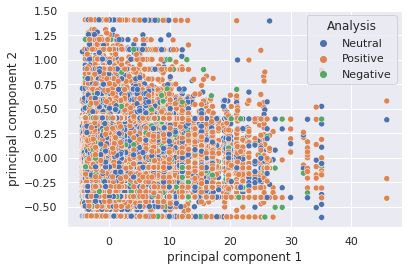

In [ ]:
sns.scatterplot(data= finalDf, x=finalDf['principal component 1'],y = 'principal component 2', hue='Analysis')

### DBSCAN

The dataset is very large so we cannot go for DBSCAN as DBSCAN is very expensive and slow.

In [ ]:
### To take straified samples from the dataset to proceed for DBSCAN

sample_data=pantry_bkp.groupby('Analysis', group_keys=False).apply(lambda x: x.sample(2000))
sample_data.head()

,rating,verified,Date,reviewerID,asin,reviewerName,unixReviewTime,description,title,also_buy,brand,feature,rank,also_view,price,review_text,clean_text,Polarity,Analysis,K_cluster
50023,4,True,2015-06-12,A45N6ETTE4ZIB,B00NJ1N9FK,Pamela Garlick,1434067200,['View largerCreate explosions of scent in you...,Gain Fireworks Moonlight Breeze Scent Beads 31...,[],Gain,[],[],"['B07D8LFKYJ', 'B00I2X7KZA', 'B07D8L6DYX', 'B0...",9.35,"Four Stars Like this, but was using it wrong. ...",star like wrong like,-0.50000,Negative,1
25655,1,True,2015-03-10,ABO6VUIO5SCEO,B0095F7YEQ,Kindle Customer,1425945600,"['Brads Raw Leafy Kale Chips, 2.5 Oz', 'Do you...","Brad's Raw Crunchy Kale, Naked, 2.5 Ounce",[],Brad's Raw,[],"244,176 in Grocery & Gourmet Food (",[],0.99,One Star Absolutely god awful tasting--had to ...,star absolutely god awful taste spit immediately,-0.40000,Negative,0
88611,5,True,2017-08-07,A2F2KHOG5405E7,B00WFVWK2S,R.Ferre,1502064000,['People all over the world choose Heinz becau...,"Heinz Yellow Mustard, 20 Ounce",[],Heinz Mustard,[],"2,403 in Grocery & Gourmet Food (","['B000WHXN3C', 'B00WFVWETM', 'B00I9VBSXK', 'B0...",2.09,"I hate mustard, but the family likes it conven...",hate mustard family like convenient purchase a...,-0.20000,Negative,0
125836,5,True,2018-02-28,A30Z1N3AS6N4AT,B01B4N9Y6C,ama,1519776000,"[""Cottonelle Clean Care toilet paper with Clea...",Cottonelle CleanCare Big Roll Toilet Paper (Pa...,[],Cottonelle,[],[],"['B01DBKRSHI', 'B00I8DS5DA', 'B01DBKRWWY', 'B0...",6.99,Efficient and very absorbent - for sensible ad...,efficient absorbent sensible adults extremely ...,-0.12500,Negative,1
14615,4,True,2015-09-19,A1Z3KN6VKPH1OF,B000WHXMYW,Vybrant,1442620800,"['Our classic ketchup is made only from sweet,...","Heinz Tomato Ketchup, 64 oz Value Size Bottle",[],Heinz,[],"4,338 in Grocery & Gourmet Food (","['B000WHXN3C', 'B000WHXMWO', 'B076CN7JWK', 'B0...",4.69,Four Stars Is it a little thinner than the reg...,star little thinner regular stuff,-0.09375,Negative,0


In [ ]:
X = sample_data[['price','Polarity','rating']]    ### extracting the indenpendent varibles

In [ ]:
from sklearn.cluster import DBSCAN       ### importing DBSCAN 
dbscan=DBSCAN()                          ### defining model
dbscan.fit(X)                            ### fitting the model

DBSCAN()

In [ ]:
from sklearn.neighbors import NearestNeighbors          ### importing nearstneighbors
neigh = NearestNeighbors(n_neighbors=2)                 ### defining neighbors
nbrs = neigh.fit(X)                                     ### fitting model
distances, indices = nbrs.kneighbors(X)                 ### getting distances 

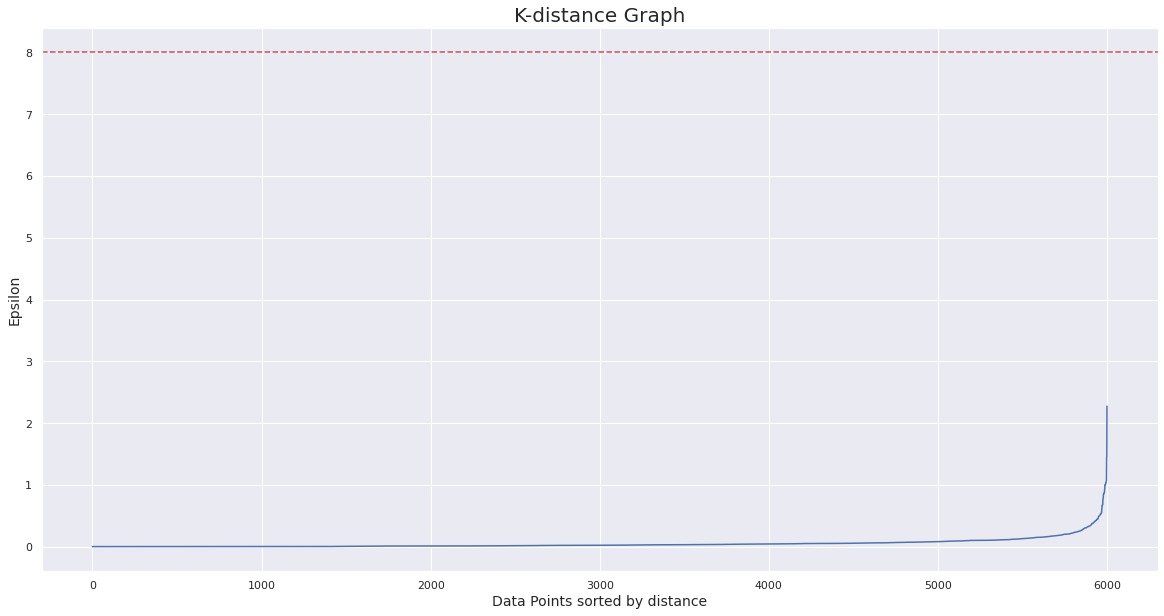

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)                  ### sorting the distances
distances = distances[:,1]
plt.figure(figsize=(20,10))                             ### figure size
plt.plot(distances)                                     ### plotting graph
plt.axhline(y=8, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
eps=1               ### from above got epsilon value as 1
for min_samples in range(2,10,1):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)     ### defining model
    cluster_labels = clusterer.fit_predict(X)                ### to predict the clusters
    data1 = cluster_labels +2
    y = np.bincount(data1)                                  ### counts the number of unique values in data1
    ii = np.nonzero(y)[0]                                   ### to Compute the indices of the elements that are non-zero
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 1 | min_samples=  2 | obtained clustering:  [(1, 10), (2, 5946), (3, 2), (4, 11), (5, 2), (6, 7), (7, 6), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2)]
eps= 1 | min_samples=  3 | obtained clustering:  [(1, 30), (2, 5946), (3, 7), (4, 6), (5, 11)]
eps= 1 | min_samples=  4 | obtained clustering:  [(1, 30), (2, 5942), (3, 4), (4, 7), (5, 6), (6, 11)]
eps= 1 | min_samples=  5 | obtained clustering:  [(1, 35), (2, 5941), (3, 7), (4, 6), (5, 11)]
eps= 1 | min_samples=  6 | obtained clustering:  [(1, 36), (2, 5933), (3, 7), (4, 6), (5, 7), (6, 11)]
eps= 1 | min_samples=  7 | obtained clustering:  [(1, 42), (2, 5933), (3, 7), (4, 11), (5, 7)]
eps= 1 | min_samples=  8 | obtained clustering:  [(1, 57), (2, 5932), (3, 11)]
eps= 1 | min_samples=  9 | obtained clustering:  [(1, 60), (2, 5895), (3, 22), (4, 13), (5, 10)]


In [ ]:
from sklearn.cluster import DBSCAN     

dbscan_opt=DBSCAN(eps=1,min_samples=5)      ### from above got epsilon value as 1 and min_samples as 5
dbscan_opt.fit(X)                           ### to fit the model

DBSCAN(eps=1)

In [ ]:
X['DBSCAN_opt_labels']=dbscan_opt.labels_         ### to add labels to the dataset

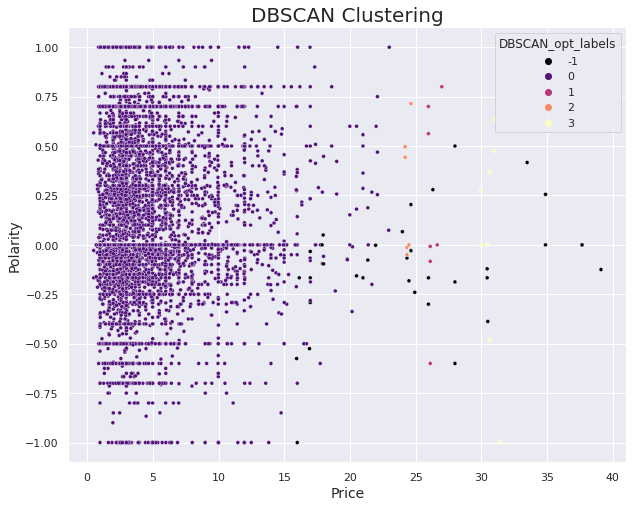

In [ ]:
import seaborn as sns

X1 = X.values

plt.figure(figsize=(10,8))
sns.scatterplot(X1[:,0],X1[:,1],hue=X['DBSCAN_opt_labels'],s=15, palette='magma')      ### to plot the graph
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Price',fontsize=14)
plt.ylabel('Polarity',fontsize=14)
plt.show()

In [ ]:
### Silhoutte score

print("Silhouette Coefficient for DBSCAN: %0.3f" % silhouette_score(X1, X['DBSCAN_opt_labels']))

Silhouette Coefficient for DBSCAN: 0.774


### Hierarchical Clustering

Hierarchical clustering does not go well with large dataset as it is expensive and slow. So we are working on the sample of the data.

In [ ]:
X = sample_data[['price','Polarity','rating']].values    ### extracting the independent variables or columns

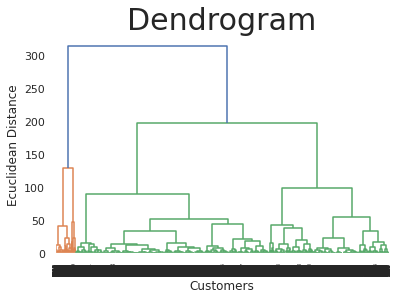

In [ ]:
### To plot the dendrogram

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram', fontsize = 30)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

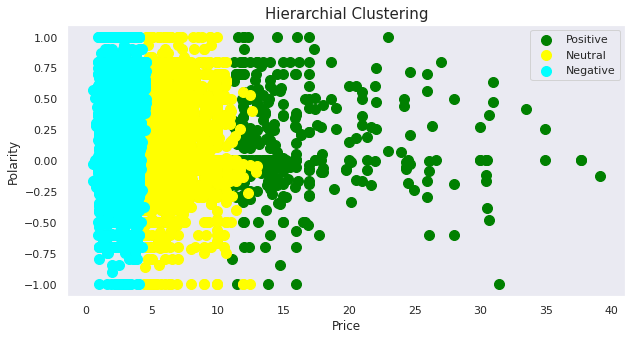

In [ ]:
from sklearn.cluster import AgglomerativeClustering

### from above graph got clusters as 3
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')  ### defining model
y_hc = hc.fit_predict(X)                                                                ### to predict the cluster


plt.figure(figsize = (10,5))                                                            ### plot size

### to plot the graph
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'green', label = 'Positive') 
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Neutral')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Negative')



plt.title('Hierarchial Clustering', fontsize = 15)
plt.xlabel('Price')
plt.ylabel('Polarity')
plt.legend()
plt.grid()
plt.show()

In [ ]:
### Silhouette score 

print(f'Silhouette Score for Hierarchical Clustering : {silhouette_score(X, y_hc)}')

Silhouette Score for Hierarchical Clustering : 0.4408846460990568


In [ ]:
### K means

In [ ]:
X3 = sample_data[['rating','price','Polarity']].values

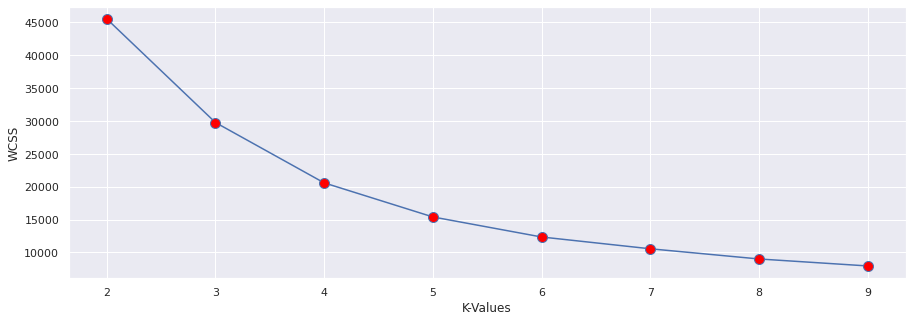

In [ ]:
distortion=[]   ### To store the wcss values

for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=22)     ### Defining model
    kmeans.fit(X3)                                  ### Fitting the model
    
    distortion.append(kmeans.inertia_)             ### Inertia is the sum of squared distances of samples to their closest cluster centre
    
fig=plt.figure(figsize=(15,5))                      ### Size of the plot
plt.plot(range(2,10),distortion,marker='o',markerfacecolor='red',markersize=10)   ## plotting the graph
plt.grid(True)
plt.xlabel("K-Values")
plt.ylabel("WCSS")
plt.show()

In [ ]:
#### From the above graph the elbow is bending at 3, so considering the clusters as 3


kmeans_3=KMeans(n_clusters=3,random_state=22)   ### Defining model with cluster as 3
kmeans_3.fit(X3)                                ### Fitting the model

KMeans(n_clusters=3, random_state=22)

In [ ]:
cluster_labels=kmeans_3.fit_predict(X3)

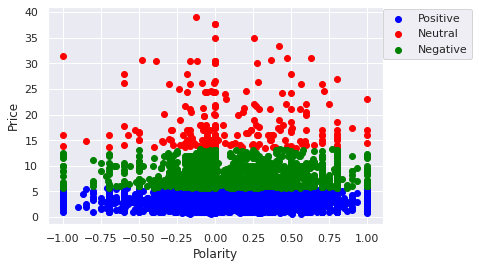

In [ ]:
### Plotting 2D graph considering parameters Price and polarity

plt.scatter(X3[cluster_labels==0,2] , X3[cluster_labels==0,1], c='Blue',label='Positive' )
plt.scatter(X3[cluster_labels==1,2] , X3[cluster_labels==1,1], c='red' ,label='Neutral')
plt.scatter(X3[cluster_labels==2,2] , X3[cluster_labels==2,1], c='green',label='Negative')


plt.xlabel('Polarity' )
plt.ylabel('Price')
plt.legend(loc=(1,.76))
plt.show()

In [ ]:
## Silhouette Score

print(f'Silhouette Score for Kmeans: {silhouette_score(X1, cluster_labels)}')

Silhouette Score for Kmeans: 0.5904962070908563
